<a href="https://colab.research.google.com/github/ssondhi2027/pytorch-ml/blob/main/Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
!pip list

Package                                  Version
---------------------------------------- ------------------
absl-py                                  1.4.0
accelerate                               1.12.0
access                                   1.1.10.post3
affine                                   2.4.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.3
aiosignal                                1.4.0
aiosqlite                                0.22.1
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.18.4
altair                                   5.5.0
annotated-doc                            0.0.4
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                          

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
# create a class that inherits aa,modue
class Model(nn.Module):
  # imput layer (4 feature of flower)-->
  #hiden layer1 (number of neurons) -->
  # H2 (n) -->
  # output 3 classes of iris flowers

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

# relu : retified linear unit
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [9]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [16]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [17]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-973526484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [21]:
 # train split set x and y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [23]:
# convert these to numpy array
X = X .values
y = y.values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [27]:
# convert x features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [28]:
# convert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [30]:
# set the criteria of the model to maisure the error , how far off the predictions are
criterion = nn.CrossEntropyLoss()
# choose optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [31]:
# train our model
epochs = 100
looses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  looses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'epoch: {i} loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.1251550912857056
epoch: 10 loss: 1.0096259117126465
epoch: 20 loss: 0.8157405853271484
epoch: 30 loss: 0.585706353187561
epoch: 40 loss: 0.3999636471271515
epoch: 50 loss: 0.26768800616264343
epoch: 60 loss: 0.17942361533641815
epoch: 70 loss: 0.12151690572500229
epoch: 80 loss: 0.0860118493437767
epoch: 90 loss: 0.06520850956439972


Text(0.5, 0, 'epoch')

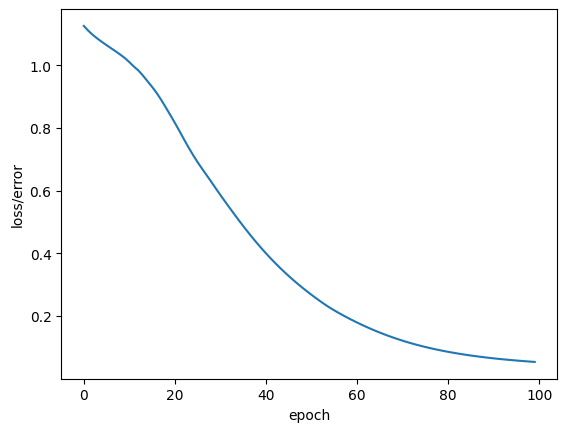

In [34]:
plt.plot(range(epochs), looses)
plt.ylabel('loss/error')
plt.xlabel('epoch')